# DUN 28.04.16
## Intermitencyje

Ostatnio: trzy generyczne intermitencje z charakterystycznymi zachowaniami

Wykrywanie intermitencji i rozpoznawanie. Czy eksperyment pasuje do jednego z tych trzech? Generalnie nie musi.

### Intermitencja t1: natężenie światła w laserze 4-poziomowej

Sztuczka eksperymentatorska: po prostu bierzemy szereg czasowy i robimy $I(n+1) = f(I(n))$

Zbiega do krzywej stycznej do przekątnej

Zmieniamy siłę pompowania: zmienia się okres intermitencji...

Rozpoznawanie końca fazy laminarnej: tam gdzie amplituda jest wyższa niż średnia kilku poprzednich. Różnice kolejnych indeksów: długości faz laminarnych. Można zrobić histogram. Podkowa, ale bez lewej strony: bo nie da się znaleźć np. fazy laminarnej o długości 1!

> Faza laminarna dla Biełousowa - Żabotyńskiego, w postaci ASCII: `................................|......................`

> Dobry sposób liczenia tego: obliczenie rSTD (na pięciu kolejnych) punktach. Wyraźne zmiany rSTD na obszarach chaotycznych.

Wychodzi z przykładu z laserem log-nachylenie -0.52, prawie dokładnie jeden przez pierwiastek. Nice.

### Intermitencja T3: konwekcja Rayleigha-Benarda, *subcritical pitchfork bifurcation*
(ta z punktem przegięcia $x_n^3$)

Przepuszczamy światło z dobraną polaryzacją. Modulacja światła: takie trochę marchewki na wykresie. Gęsta część środkowa + symetryczne odbicia takiego jakby dymku.

Trik: wyznaczamy $x_{n+2} = f(x_n)$, czyli dwukrotne złożenie naszej funkcji. Zaczynając od dodatniej dostajemy górną gałąź, zaczynając od ujemnej: dolną gałąź.


### Intermitencja T3: nieliniowa dioda w układzie elektronicznym
$V(t)$, znowu: gęsty środek i okresowe zaburzenia ** *symetryczne wzg. średniej* **

### Intermitencja T2: dodatkowa częstość w układzie
AKA Bifurkacja Hopfa

* Różne skale czasowe? Drgania z modulacją. Yup, to jest to. Dodatkowa częstość daje ruch po torusie (GYRATION! GYRORADIUS! WOOOOOOOOT PLAZEMKI!)
* Wygląda jak trzy sygnały splecione ze sobą -> wyświetlamy co trzecią próbkę
* Na Poincare return mapie: prosta prawie przekątna, nieco nad. Wtedy odwzorowanie jest spiralne - ruch jest kwaziperiodyczny.
* Globalne przyciąganie do niestabilnego punktu stałego, po zbliżeniu zostajemy odrzuceni na dużą odległość. To troszkę jak kolizje cząstek...?

* Od punktu stałego do cyklu granicznego (note: nie jedyna bifurkacja która tak robi!)

* Może prowadzić do quasiperiodyczności

## Szumy

Szum $1/f$: $P \sim 1/f$

Pojawia się w ciałach stałych, układach elektronicznych (to nie jest *shot noise*!), obrocie Ziemi (zmienność $\omega$), głosie (głośność), membranach nerwowych, ruchu na autostradach

Zjawisko **bezskalowe** - własności statystyczne podobne dla $10^0$ Hz jak dla $10^3$ Hz. Charakterystyczne dla fraktali.

Modele lawinowe
* schodkowa siatka
* rozkładamy cząstki na siatce
* Gdy oczko przekroczy gęstość krytyczną, zsyp na kolejną siatkę

Szum $1/f^2$ - idzie opisać random walkiem

## Liniowe i nieliniowe oscylatory
* Oscylator harmoniczny: jedyny faktycznie STAŁY i NIEZMIENIALNY parametr: częstość
    * Brak stanów nieustalonych
* Dwa sprzężone oscylatory:
    * przekaz energii - wydajnie tylko przez tarcie ($-\gamma \dot{x}$, $\gamma$ jest nieliniowa)
* Rezonans - zjawisko czysto liniowe - nieliniowe tłumienia

> Nieliniowe jak nieczarne

Częsty typ: oscylator z cyklem granicznym *van der Pola*.

$$x'' + \mu (x^2 - 1)x' + x = 0$$

Inaczej
$$x' = y$$
$$y' = \mu (1-x^2)y - x$$

Zakładamy $\mu > 0$

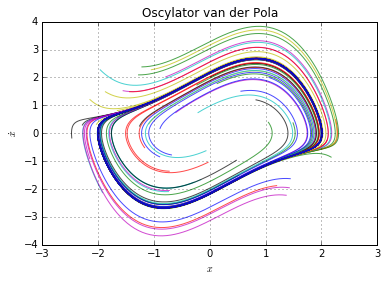

In [365]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

def vdp(r, t, mu):
    x, y = r
    return np.array([y, mu*(1-x*x)*y - x])

mu = 1
t = np.linspace(0, 100, 10000)
plt.xlabel('$x$')
plt.ylabel('$\dot{x}$')
plt.title('Oscylator van der Pola')
max_init = 5
plt.grid()
for i in range(50):
    r = odeint(vdp, max_init*np.random.random(2)-max_init/2, t, args=(mu,)).T
    x, y = r
    plt.plot(x, y, alpha=0.7)

Z dowolnego punktu w przestrzeni zbiegamy do krzywej granicznej.

W przeciwieństwie do oscylatora harmonicznego, amplituda NIE jest funkcją fazy - mamy kilka amplitud np. na fazie $\pi/2$. Ciąg amplitud na danej fazie zbiega po długiej liczbie obiegów do wartości wskazywanej przez cykl graniczny.

Przykład: Oscylator z diodą nieliniową, wymyślony żeby symulować arytmię.

### Sprzężone oscylatory nieliniowe
Często próbują "uzgodnić zachowanie", poetycko: *"śpiewać wspólnie"*.

Jeśli jeden jest silniejszy, ustala zachowanie drugiego. **synchronizacja synfazowa**

Wymierne stosunki częstości oscylacji (tokamaki...)

Serce działa jak oscylator nieliniowy

* **quasiperiodyczność** - zgodny ruch, niewymierny stosunek częstości - daje wrażenie regularności

* **ruch chaotyczny**

> silny, niezależny oscylator z duszą

* niezależne zachowanie od zewnętrznych warunków
* łatwość snchronizacji, co pozwala symulować w
    * biologii
        > cykl 27 godzinny; najszybszy oscylator relaksacyjny przewodzi

    * technicznych
        * **modelocking?**
        * lock-in amp: oscylator liniowy, może wykryć składową harmoniczną w zaszumionym sygnale
        * strojenie: synchronizacja między wewnętrznym a zewnętrznym oscylatorem

### W6S5

[Oscylator Duffinga](http://www.scholarpedia.org/article/Duffing_oscillator)

$$\ddot{x} + \delta \dot{x} + \beta x + \alpha x^3 = \gamma \cos {\omega t}$$
U nas:
$$\ddot{\theta} + \alpha \dot{\theta} + a \theta (\theta^2-1) = B \cos{t}$$

Więc
* Nasze $\alpha$ = $\delta$
* Nasze $a = \alpha$, ich $\beta = -a$

In [366]:
def duffing(r, t, a, alpha, B, period):
    theta, omega = r
    return np.array([omega, -alpha*omega - a*theta*(theta**2-1) + B*np.cos(2*np.pi*t/(period*dt))])

a = 1
alpha = 0.2
B = 0.3
t, dt = np.linspace(0, 10000*2*np.pi, 1000000, retstep=True)
period = 100 #okres w krokach czasowych
print(dt, period*dt)
r0 = np.random.random(2)
r = odeint(duffing, r0, t, (a, alpha, B, period))

0.06283191590371177 6.283191590371177


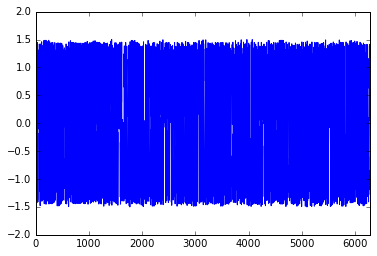

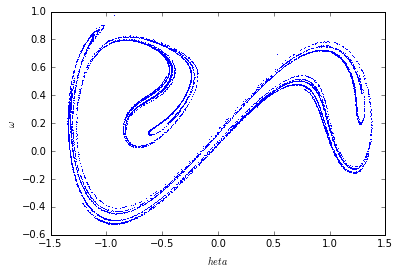

In [367]:
#przebieg czasowy
theta, omega = r.T
plt.figure()
plt.xlim(0, t.max()/10)
plt.plot(t, theta)

# stroboskop
theta_n, omega_n = r[::period].T
plt.figure()
plt.plot(theta_n, omega_n, "b,")
plt.xlabel("$\theta$")
plt.ylabel("$\omega$");

Potrzeba tutaj zastosować układ równań - dwuwymiarowe odwzorowanie, przez to że mamy różne możliwe wartości $\omega$ od $\theta$. Dostajemy wtedy **odwzorowanie okręgu**.

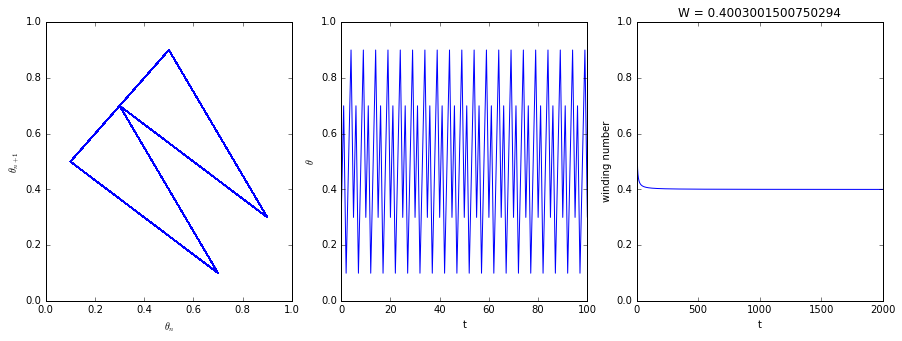

In [381]:
def circle(theta0, t, Omega, K):
    r = np.zeros_like(t, dtype=float)
    r[0] = theta0
    for i in range(1, len(t)):
        theta = r[i-1]
        r[i] = (theta + Omega - K*np.sin(2*np.pi*theta)/2/np.pi)
    return r

def circle_plot(theta, Omega, K, plotting=True):
    t = np.arange(2000, dtype=float)
    r = circle(theta, t, Omega, K)
    
    winding_number = r.cumsum()[1:]/t.cumsum()[1:]
    if plotting:
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
        ax1.plot(r[:-1]%1, r[1:]%1)
        ax1.set_xlabel(r'$\theta_n$')
        ax1.set_ylabel(r'$\theta_{n+1}$')
        ax2.plot(t, r%1)
        ax2.set_xlim(0, 100);
        ax2.set_xlabel("t")
        ax2.set_ylabel(r"$\theta$")
    
        ax3.set_xlabel("t")
        ax3.set_ylabel("winding number")
        ax3.plot(t[1:], winding_number)
        ax3.set_title("W = {}".format(winding_number[-1]))
        ax3.set_ylim(0,1)
circle_plot(theta=0.3, K=0, Omega=0.4)

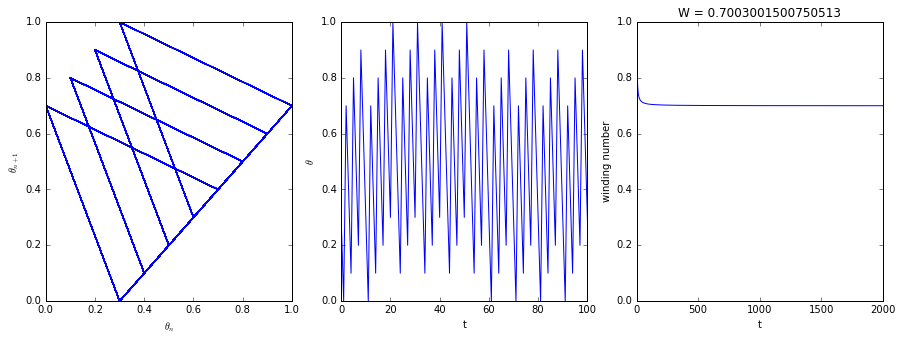

In [382]:
circle_plot(theta=0.3, K=0, Omega=7/10) #po transiencie zaczyna się faktycznie zgadzać
# 7 punktów na prawej dolnej prostej (pogrubionej!), 10 razem z górnymi

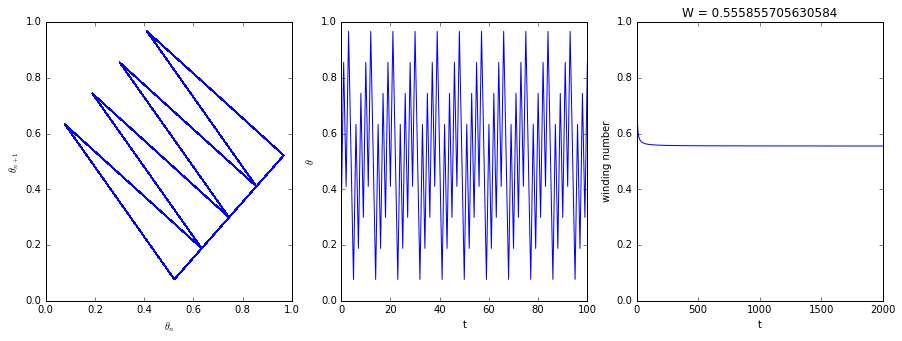

In [383]:
circle_plot(theta = 0.3, K=0, Omega = 5/9)

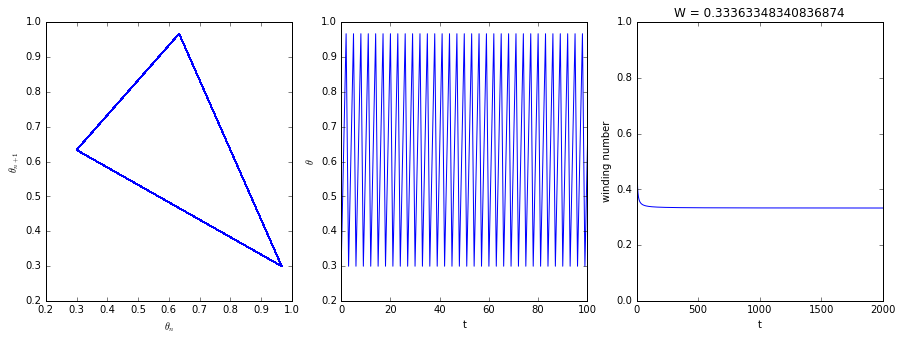

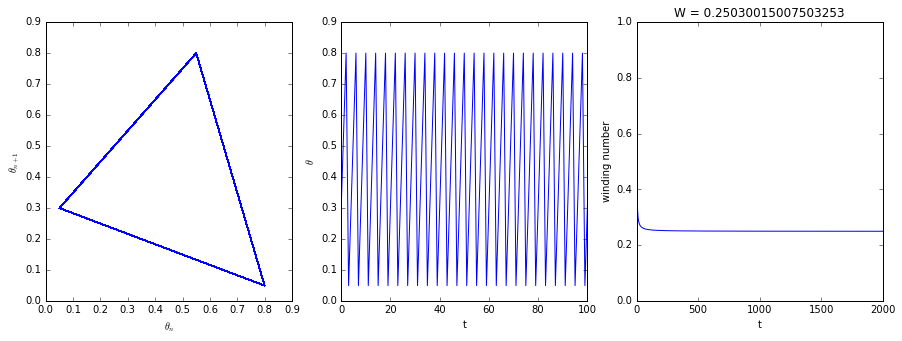

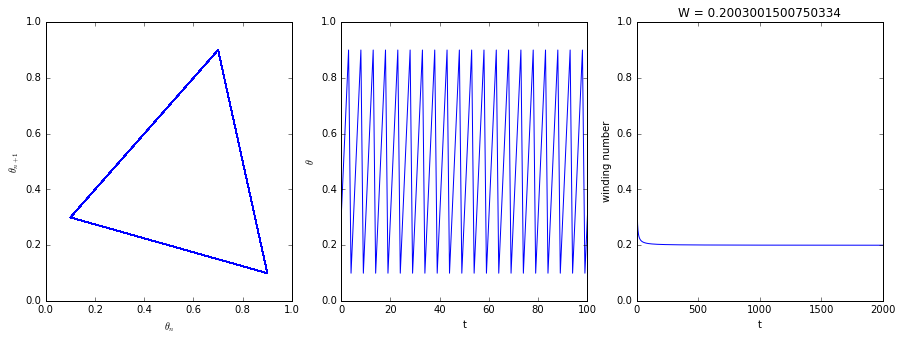

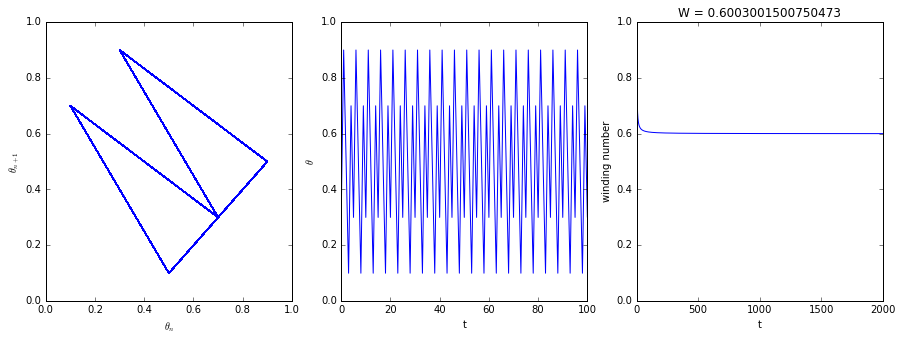

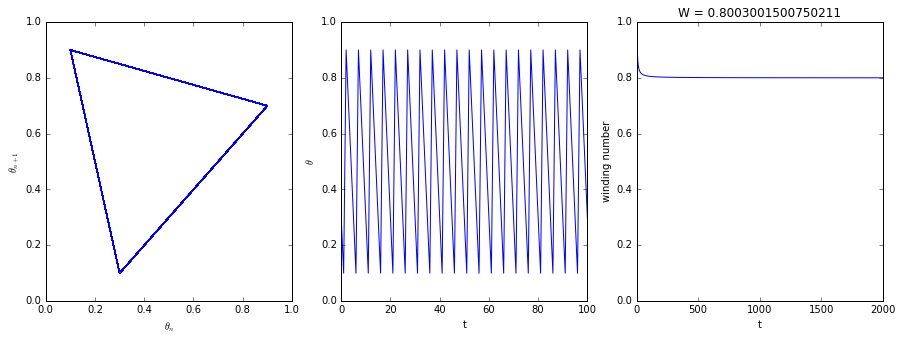

In [384]:
circle_plot(theta=0.3, K=0, Omega=1/3) #działa
circle_plot(theta=0.3, K=0, Omega=1/4) #nie działa
circle_plot(theta=0.3, K=0, Omega=1/5) #nie działa
circle_plot(theta=0.3, K=0, Omega=3/5) #działa
circle_plot(theta=0.3, K=0, Omega=4/5) #nie działa

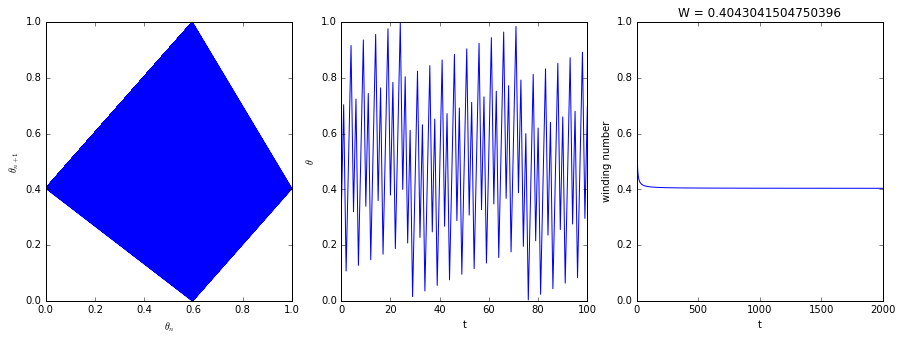

In [385]:
circle_plot(theta=0.3, K=0, Omega=0.4040040004) #quasiperiodyczna, nigdy się do końca nie zamyka

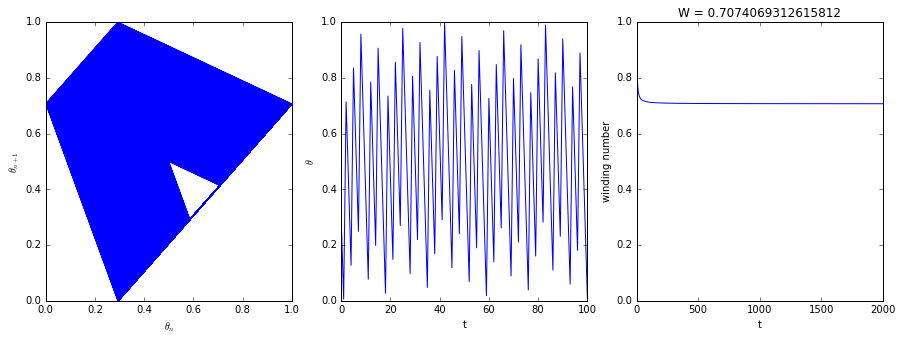

In [386]:
circle_plot(theta=0.3, K=0, Omega=2**-0.5) #quasiperiodyczna, nigdy się do końca nie zamyka

### Mode locking

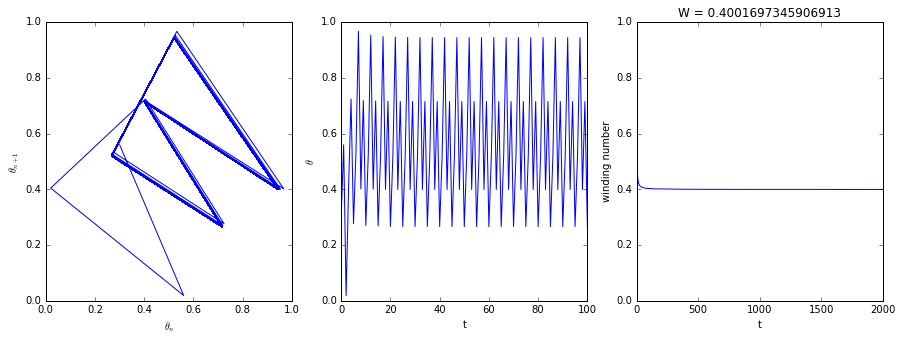

In [387]:
circle_plot(theta=0.3, K=0.95, Omega=0.4040040004)

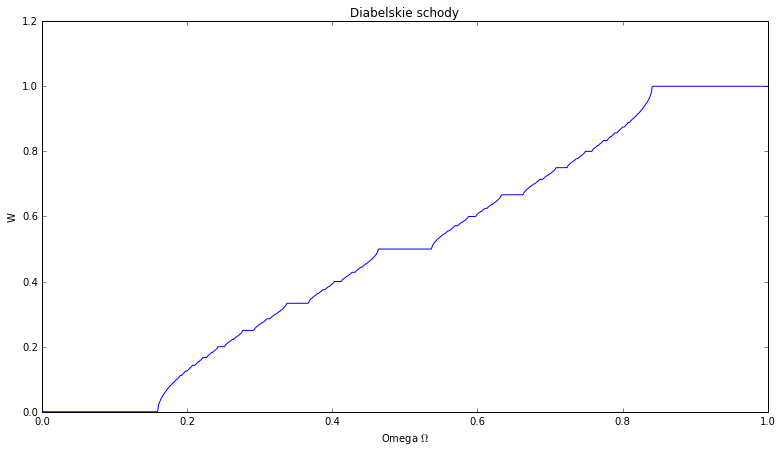

In [375]:
Omega = np.linspace(0, 1, 1000)
def circle_winding_number(theta0, Omega, K):
    t = np.arange(20000, dtype=float)
    theta = np.ones_like(Omega, dtype=float)*theta0
    r = np.zeros((len(t), len(Omega)), dtype=float)
    r[0] = theta
    for i in range(1, len(t)):
        theta = r[i-1]
        r[i] = (theta + Omega - K*np.sin(2*np.pi*theta)/2/np.pi) 
    winding_number = r.sum(axis=0)/t.sum(axis=0)
    return winding_number

plt.figure(figsize=(13,7))
plt.plot(Omega, circle_winding_number(0.5, Omega, 1))
plt.title("Diabelskie schody")
plt.xlabel("Omega $\Omega$")
plt.ylabel("W");

### Rzut 2D na czas, po jakim faza się powtarza (języki Arnolda)
[Polecam poczytać tutaj na temat tego, co tu jest właściwie plotnięte](https://en.wikipedia.org/wiki/File:Circle_map_poincare_recurrence.jpeg)

In [376]:
Omega = np.linspace(0, 1, 300)
K = np.linspace(0, 4*np.pi, 300)
OmegaXY, KXY = np.meshgrid(Omega, K)
def circle_recurrence_number(theta0, OmegaXY, KXY, epsilon = 0.0001, Nmax=20000):
    theta = np.ones_like(OmegaXY)*theta0
    theta_initial = theta.copy()
    recurrence_final = np.ones_like(theta) * Nmax
    done = np.zeros_like(recurrence_final, dtype=bool) #none of them done
    for i in range(Nmax):
        theta = (theta + OmegaXY - KXY*np.sin(2*np.pi*theta)/2/np.pi)
        true_indices = np.abs(theta-theta_initial)%1 < epsilon
        recurrence_final[(~done) * true_indices] = i
        done[(~done)*true_indices] = True
        if true_indices.all():
            print("break at i={}".format(i))
            break
    return recurrence_final

recurrence = circle_recurrence_number(0.5, OmegaXY, KXY)

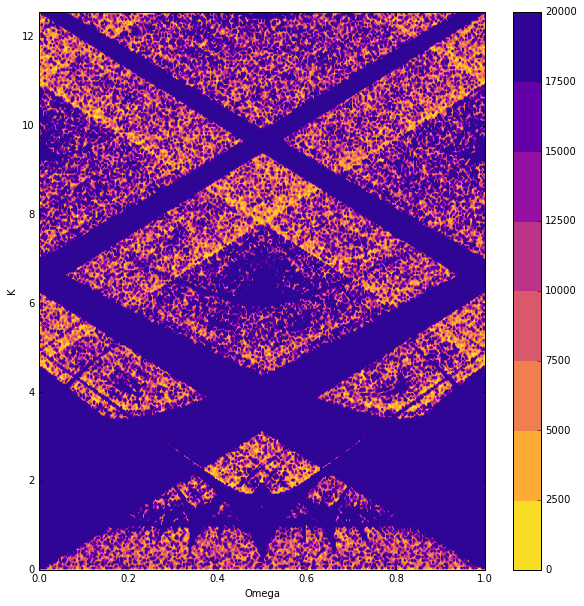

In [377]:
plt.figure(figsize=(10,10))
plt.contourf(OmegaXY, KXY, recurrence, cmap='plasma_r')
plt.colorbar()
plt.xlabel("Omega")
plt.ylabel("K");

### Drogi do chaosu
Chodzi o różne możliwe przejścia między rejonami na tej powyższej siatce. Jak przez dwie godziny sobie porysować ten wykres to to jest naprawdę jasne i nie trzeba dalej tłumaczyć. :D